In [49]:
%%bash
git add Mappings\ ipython.ipynb

In [ ]:
%%bash
git commit Mappings\ ipython.ipynb -m ""

In [20]:
#!/usr/bin/python
import os, sys, random

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import cauchy
import numpy as np
from io import StringIO
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression

file = open("airports-extended.dat.txt","r")

def powerlaw(x,a,b,c):
    return a*x**b+c

def f5(x,a,b,c,d,g,h):
    return a*x**5+b*x**4+c*x**3+d*x**2+g*x+h

def f3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

def VowelToConsRatio(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels


    return float(vowels)/float(consonents), float(spaces)/float(consonents), float(others)/float(consonents)



def AirportNameLetterFrequency(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels
    #put a one at the end to account for one airport in number totaled. will be normalized later

    return [consonents, vowels, spaces, others, 1]


def MergeCount(totalCount, thisCount):
    totalCount2=totalCount+thisCount
    return totalCount2


def transformphrase(testphrases,kpca,lr3to2_lat,lr3to2_long):
    xphrases=[]
    for phrase in testphrases:
        print(phrase)
        vtc, stc, otc = VowelToConsRatio(phrase)
        xphrases.append([vtc,stc,otc])
    scaler=StandardScaler()
    xphrases2=scaler.fit_transform(xphrases)
    X_kpca_phrases=kpca.fit_transform(xphrases2)
    phraselatpred=lr3to2_lat.predict(X_kpca_phrases)
    phraselongpred=lr3to2_long.predict(X_kpca_phrases)
    return phraselatpred,phraselongpred

def LatLongClassMaker(coor):
    lat,long=coor
    if lat<30:
        if long>-90:
            return 1 #florida
        elif long < -120:
            return 2 #hawaii
        else:
            return 3 #texas
    elif lat >50:
        return 4 #alaska
    elif long> -80 and lat < 40:
        return 5 #south east
    elif long> -80 and lat >40:
        return 6 #new england
    elif long< -80:
        return int((50-lat)/20.*5)*int((125+long)/45.*9)+7
    else:
        return 0
    #worst mapping ever-- ignores new england and city diversity
    return 0
ratio=[]
coords=[]


for line in file:
    line=re.split(',',line);

    if line[3] == "\"United States\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
        coords.append([float(line[6]),float(line[7])])


ratioarray=np.empty([len(ratio),3])
coordsarray=np.empty([len(coords),2])
regionarray=np.empty([len(coords)])

for i, rat in enumerate(ratio):
    ratioarray[i,:]=rat
for i,coor in enumerate(coords):
    coordsarray[i,:]=coor
#    outputcoor=LatLongClassMaker(coor)
#    regionarray[i]=outputcoor


xtrain,xtest,ytrain,ytest=train_test_split(ratioarray,coordsarray,test_size=0.33,shuffle=True, random_state=random.randint(1,101))
testphrases=["Ufda!", "I just dont know about that", "Howdy, pardner", "Where are we?", "I thank whatever gods may be for my unconquerable soul.", "I welcome our new robot overlords", "l33t h4k3rs", "I know you I walked with you once upon a dream", "These stories dont mean anything if you have no one to tell them to", "Baby you have the sort of hands that rip me apart","Multi-messenger astronomy", "Rainbow flag", "I prefer They or He?", "numerical relativity", "LIGO", "scalar field", "Osculating Orbits", "Monte-Carlo Simulation", "Data Analysis", "Data Science", "Parallelization", "Paralyzation", "Partial disability", "Non-epileptic seizures", "Wednesday Lunch", "Tuesday Lunch", "Thursday Lunch", "Guild Wars", "Elvenar", "Good Apple"]

colleaguephrases=["general relativity", "black hole", "loop quantum gravity",  "quantization", "space-time", "Hamiltonian constraint", "Ashtekar", "LiSA", "LIGO", "group", "white hole", "scalar field", "numerical relativity", "cosmology", "diffeomorphism", "continuum limit", "David Berger", "Reisner-Nordstrom", "black hole spacetime", "initial data", "interpretation of quantum mechanics"]


mysongs=["My gift is your song and this one’s for you.",
"I closed my eyes, drew back the curtain, to see for certain, what I thought I knew.",
"Mamma if you don’t mind my sayin so you have a bad habit of changing every subject. No I didn’t change the subject.",
"I did not live until today, how can I live when we are parted? One day more.",
"Pick a little talk a little pick a little talk a little cheep cheep cheep talk a lot pick a little more…",
"I’ll be your queen, and you’ll be my castle.",
"She’s wicked so we’ve got to bring her down. ",
"And all this science I don’t understand. It’s just my job five days a week.",
"A life time of not knowing where or how or why or when.",
"Mathematics isolation rhythm feeling power harmony and heavy competition.",
"I’m through playing by the rules of someone else’s game. Too late for second guesses too late to go back to sleep. It’s time to trust my instincts close my eyes and leap. It’s time to try defying gravity and you can’t pull me down.",
"Maybe far away, or maybe real nearby… ",
"SO IF YOU CARE TO FIND ME LOOK TO THE WESTERN SKY AS SOMEONE TOLD ME LATELY EVERYONE DESERVES A CHANCE TO FLY and if I’m flying solo at least I’m flying free to those who ground me take a lesson back from me. ",
"I’m sorry for everything I said and for everything I forgot to say too…"]

dadssongs=["1. Mars ain't no place to raise a kid. Besides it’s cold as hell",
"2. she’ll have fun, fun, fun till her daddy takes her T bird away",
"3. A man hears what he wants to hear, and disregards the rest",
"4. All revved up and no place to go",
"5. Why they changed it, I can’t say…people just liked it better that way",
"6. First you take a step to the left, then you jump to the right",
"7. Young man!!",
"8. And while I’m away, I’ll write home every day..and send all my lov’in to you",
"9. Each night before you go to bed, my baby, whisper a little prayer for me, my baby",
"10. Master of the house, keeper of the zoo",
"11. May you be forever young",
"12. Weave me the sunshine"]

momphrases=["I just don’t know about that.",
"Well that’s different.",
"Way to go!",
"That’s awesome!",
"In a little while…",
"Go to bed!",
"It’ll all work out."
"Sooner or later",
"Clean your room!",
"The one with the most fabric wins.",
"I’m off to sew!",
"It’s a great day!",
"How can I help?",
"Time to eat!",
"Read your book.",
"Are you ready?",
"I’m sure."]

sisterphrases=["1. Running down the dream", "2. How much is a gallon?", "3. Dead snake on a lake", "4. Pseudaphed and tumbleweeds", "5. East Jesus Nowhere", "6. Taxation without representation", "7. Old people, high schoolers and drug dealers", "8. it was a trial for... MURDER!", "9. Rock lobster", "10. Trapeze hands", "11. Hinga Weezy", "12. Patty dance pants"]

 


xphrases=[]
for phrase in testphrases:
    print(phrase)
    vtc, stc, otc = VowelToConsRatio(phrase)
    xphrases.append([vtc,stc,otc])
xcolleague=[]
for phrase in colleaguephrases:
    print(phrase)
    vtc, stc, otc = VowelToConsRatio(phrase)
    xcolleague.append([vtc,stc,otc])



scaler = StandardScaler()
xtrain2=scaler.fit_transform(xtrain)
xtest2=scaler.fit_transform(xtest)
xphrases2=scaler.fit_transform(xphrases)
#xcolleague2=scaler.fit_transform(xcolleague)



kpca=KernelPCA(n_components=9, random_state=False, kernel="poly", degree=3, tol=1e-3, max_iter=None, remove_zero_eig=False, fit_inverse_transform=False)
X_kpca_train=kpca.fit_transform(xtrain2)
X_kpca_test=kpca.fit_transform(xtest2)
X_kpca_phrases=kpca.fit_transform(xphrases2)
#X_kpca_colleague=kpca.fit_transform(xcolleague2)

print(X_kpca_phrases[0])
print(X_kpca_train[0])
#print(X_kpca_colleague[0])

print(np.shape(X_kpca_train))
print(np.shape(ytrain))
lr3to2_lat=LinearRegression()
lr3to2_long=LinearRegression()
lr3to2_lat.fit(X_kpca_train,ytrain[:,0])
lr3to2_long.fit(X_kpca_train,ytrain[:,1])



latparams=lr3to2_lat.get_params()
longparams=lr3to2_long.get_params()
latprediction=lr3to2_lat.predict(X_kpca_train)
longprediction=lr3to2_long.predict(X_kpca_train)
phraselatpred,phraselongpred=transformphrase(testphrases,kpca,lr3to2_lat,lr3to2_long)
phraselatcolleague,phraselongcolleague=transformphrase(colleaguephrases,kpca,lr3to2_lat,lr3to2_long)
phraselatsong,phraselongsong=transformphrase(mysongs,kpca,lr3to2_lat,lr3to2_long)
phraselatdad,phraselongdad=transformphrase(dadssongs,kpca,lr3to2_lat,lr3to2_long)
phraselatmom,phraselongmom=transformphrase(momphrases,kpca,lr3to2_lat,lr3to2_long)
phraselatsister,phraselongsister=transformphrase(sisterphrases,kpca,lr3to2_lat,lr3to2_long)
print(testphrases)
print(phraselatpred)
print(phraselongpred)




Ufda!
I just dont know about that
Howdy, pardner
Where are we?
I thank whatever gods may be for my unconquerable soul.
I welcome our new robot overlords
l33t h4k3rs
I know you I walked with you once upon a dream
These stories dont mean anything if you have no one to tell them to
Baby you have the sort of hands that rip me apart
Multi-messenger astronomy
Rainbow flag
I prefer They or He?
numerical relativity
LIGO
scalar field
Osculating Orbits
Monte-Carlo Simulation
Data Analysis
Data Science
Parallelization
Paralyzation
Partial disability
Non-epileptic seizures
Wednesday Lunch
Tuesday Lunch
Thursday Lunch
Guild Wars
Elvenar
Good Apple
general relativity
black hole
loop quantum gravity
quantization
space-time
Hamiltonian constraint
Ashtekar
LiSA
LIGO
group
white hole
scalar field
numerical relativity
cosmology
diffeomorphism
continuum limit
David Berger
Reisner-Nordstrom
black hole spacetime
initial data
interpretation of quantum mechanics
[-0.32668191 11.23895313 -0.24619572  0.3860871

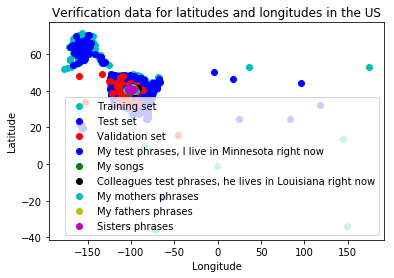

In [13]:
plt.figure()
plt.title("Verification data for latitudes and longitudes in the US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(ytrain[:,1], ytrain[:,0], c='c', label="Training set")
plt.scatter(ytest[:,1], ytest[:,0], c='b', label="Test set")
plt.scatter(longprediction,latprediction,c='r', label="Validation set")
plt.scatter(phraselongpred,phraselatpred,c='b',label="My test phrases, I live in Minnesota right now")
plt.scatter(phraselongsong, phraselatsong, c='g', label="My songs")
plt.scatter(phraselongcolleague, phraselatcolleague, c='k', label="Colleagues test phrases, he lives in Louisiana right now")
plt.scatter(phraselongmom, phraselatmom, c='c', label="My mothers phrases")
plt.scatter(phraselongdad, phraselatdad, c='y', label="My fathers phrases")
plt.scatter(phraselongsister, phraselatsister, c='m', label="Sisters phrases")
#plt.scatter(phraselongpred[0],phraselatpred[1],c='b',label=testphrases[0])
#plt.scatter(phraselongpred[1],phraselatpred[1],c='m',label=testphrases[1])
#plt.scatter(phraselongpred[2],phraselatpred[1],c='c',label=testphrases[2])
#plt.scatter(phraselongpred[3],phraselatpred[1],c='g',label=testphrases[3])
#plt.scatter(phraselongpred[4],phraselatpred[1],c='y',label=testphrases[4])
#plt.scatter(phraselongpred[5],phraselatpred[1],c='y',label=testphrases[5])
#plt.scatter(phraselongpred[6],phraselatpred[1],c='y',label=testphrases[6])
#plt.scatter(phraselongpred[7],phraselatpred[1],c='y',label=testphrases[7])
#plt.scatter(phraselongpred[8],phraselatpred[1],c='y',label=testphrases[8])
#plt.scatter(phraselongpred[9],phraselatpred[1],c='y',label=testphrases[9])
#plt.scatter(phraselongpred[10],phraselatpred[1],c='y',label=testphrases[10])
#plt.scatter(phraselongpred[11],phraselatpred[1],c='y',label=testphrases[11])
plt.legend(loc="lower right")
plt.show()



#clf=OneVsRestClassifier(MultinomialNB())
#clf=MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

#clf.fit(xtrain2,ytrain)
#predictions=clf.predict(xtrain2)
#distance=clf.decision_function(xtrain2)

#accuracy=accuracy_score(ytest,prediction)
#print(accuracy)

#fig=plt.figure()
#ax=fig.gca()


#ax.scatter(xtrain2[:,1],xtrain2[:,0],c=predictions,cmap=cm.plasma_r)

#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.title('Map of language classes for US using extended training set')
#plt.show()

In [9]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [48]:
p=figure(plot_width=600, plot_height=600, title="Training and Verification Data", x_axis_label="Longitude", y_axis_label="Latitude")
p.square(ytrain[:,1], ytrain[:,0], color="blue", legend="Coordinates of airport in training set")
p.circle(ytest[:,1],ytest[:,0],color="yellow", legend="Coordinates of airports in test set")
p.x(longprediction,latprediction, color="red", legend="Mappings of airport nanes to positions")
output_notebook()
show(p)

Loading BokehJS ...

In [46]:
p=figure(plot_width=600, plot_height=600, title="Comparison of phrases to songs", x_axis_label="Longitude", y_axis_label="Latitude")
p.square(ytrain[:,1], ytrain[:,0], color="red", legend="Training")
p.circle(phraselongpred,phraselatpred,color='blue',legend="My phrases")
p.circle(phraselongsong, phraselatsong, color='lime', legend="My songs")
output_notebook()
show(p)

Loading BokehJS ...

In [45]:
p=figure(plot_width=600, plot_height=600, title="Minnesota every day vs Louisiana professional speech", x_axis_label="Longitude", y_axis_label="Latitude")
p.square(ytrain[:,1], ytrain[:,0], color="red", legend="Training")
p.circle(phraselongpred,phraselatpred,color='blue',legend="My phrases, Minnesota")
p.circle(phraselongcolleague, phraselatcolleague, color='yellow', legend="Colleague's phrases, Louisiana")
output_notebook()
show(p)

Loading BokehJS ...

In [44]:
p=figure(plot_width=600, plot_height=600, title="Comparison to immediate family", x_axis_label="Longitude", y_axis_label="Latitude")
p.square(ytrain[:,1], ytrain[:,0], color="red", legend="Training")
p.circle(phraselongpred,phraselatpred,color='blue',legend="My phrases")
p.circle(phraselongsister, phraselatsister, color='darkturquoise', legend="My sister's phrases")
p.circle(phraselongmom, phraselatmom, color='cyan', legend="My mother's phrases")
p.circle(phraselongdad, phraselatdad, color='orange', legend="My father's phrases")
output_notebook()
show(p)

Loading BokehJS ...